In [1]:
import qnetvo as qnet
from context import src
import matplotlib.pyplot as plt

import numpy as np

from os import listdir
from os.path import isfile, join
import re

# Loading Data


In [2]:
def get_data_files(path, regex):
    """Retrieves all data files that match the ``regex`` in the
    directory specified by ``path``.
    """
    return [
        join(path, f)
        for f in listdir(path)
        if (f.endswith(".json") and isfile(join(path, f)) and bool(re.match(regex, f)))
    ]

def get_inequality_opt_dicts(path, mac_reg, ineq_range=range(7)):

    inequality_opt_dicts = []

    for i in ineq_range:
        inequality_tag = "I_" + str(i) + "_"
        
        regex = mac_reg + inequality_tag + r".*"    
        files = get_data_files(path, regex)
        inequality_opt_dicts += [[qnet.read_optimization_json(file) for file in files]]

    return inequality_opt_dicts

## Mac Data Analysis

In [3]:
data_path = "../data/33-22-2_multiaccess_twotrit_simulations/"

qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^qmac_")
eatx_mac_opt_dicts = get_inequality_opt_dicts(data_path, r"^eatx_mac_")
eatx_qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^eatx_qmac_")
ghza_cmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ghza_cmac_")
ghza_qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ghza_qmac_")

gea_cmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^gea_cmac_")
gea_qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^gea_qmac_")


# ghza_qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ghza_qmac_")
# ea3_cmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ea3_cmac_")
# ea3_qmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ea3_qmac_")
# ea_txrx_cmac_opt_dicts = get_inequality_opt_dicts(data_path, r"^ea_txrx_cmac_")
# ghza_cmac_no_locc_opt_dicts = get_inequality_opt_dicts(data_path, r"^ghza_cmac_no_locc_")

In [4]:
# MA network simulation game examples
data_path = "../data/33-22-3_multiaccess_violations/"
ineq_range = [0,1,2,3,4,7,8]

eatx_mac_opt_dicts2 = get_inequality_opt_dicts(data_path, r"^eatx_mac_", ineq_range=ineq_range)
eatx_qmac_opt_dicts2 = get_inequality_opt_dicts(data_path, r"^eatx_qmac_", ineq_range=ineq_range)
gea_cmac_opt_dicts2 = get_inequality_opt_dicts(data_path, r"^gea_cmac_", ineq_range=ineq_range)
gea_qmac_opt_dicts2 = get_inequality_opt_dicts(data_path, r"^gea_qmac_", ineq_range=ineq_range)


qmac_opt_dicts2 = get_inequality_opt_dicts(data_path, r"^qmac_", ineq_range=ineq_range)



## Analyzing Data

In [5]:
multiaccess_twotrit_witnesses = src.multiaccess_twotrit_witnesses()


def analyze_data(game_opt_dicts, inequalities):
    max_violations = []
    unscaled_max_violations = []
    qbounds = []
    cbounds = []
    for i in range(len(game_opt_dicts)):
        opt_dicts = game_opt_dicts[i]
        inequality = inequalities[i]

        if len(opt_dicts) > 0:

            cbound = inequality[0]
            cbounds += [cbound]

            qbound = 0.0
            for x in range(inequality[1].shape[1]):
                qbound += max(inequality[1][:,x])
            qbounds += [qbound]
            unscaled_max_violations += [max([max(opt_dict["scores"]) for opt_dict in opt_dicts])]
            max_violations += [(unscaled_max_violations[i] - cbound) / (qbound - cbound)] 

    return max_violations, qbounds, cbounds, unscaled_max_violations

print(len(gea_cmac_opt_dicts))

qmac_max_violations, qbounds, cbounds, unscaled_qmac_max_violations = analyze_data(qmac_opt_dicts, multiaccess_twotrit_witnesses)
eatx_mac_max_violations, qbounds, cbounds, unscaled_eatx_mac_max_violations = analyze_data(eatx_mac_opt_dicts, multiaccess_twotrit_witnesses)
eatx_qmac_max_violations, qbounds, cbounds, unscaled_eatx_qmac_max_violations = analyze_data(eatx_qmac_opt_dicts, multiaccess_twotrit_witnesses)
ghza_cmac_max_violations, qbounds, cbounds, unscaled_ghza_cmac_max_violations = analyze_data(ghza_cmac_opt_dicts, multiaccess_twotrit_witnesses)
ghza_qmac_max_violations, qbounds, cbounds, unscaled_ghza_qmac_max_violations = analyze_data(ghza_qmac_opt_dicts, multiaccess_twotrit_witnesses)

gea_cmac_max_violations, qbounds, cbounds, unscaled_gea_cmac_max_violations = analyze_data(gea_cmac_opt_dicts, multiaccess_twotrit_witnesses)
gea_qmac_max_violations, qbounds, cbounds, unscaled_gea_qmac_max_violations = analyze_data(gea_qmac_opt_dicts, multiaccess_twotrit_witnesses)



7


In [6]:
mac_sim_games = [src.bisender_mac_qubit_simulation_games()[i] for i in ineq_range]


# qmac_max_violations2, qbounds2, cbounds2, unscaled_qmac_max_violations2 = analyze_data(qmac_opt_dicts2, mac_sim_games)
eatx_mac_max_violations2, qbounds2, cbounds2, unscaled_eatx_mac_max_violations2 = analyze_data(eatx_mac_opt_dicts2, mac_sim_games)
eatx_qmac_max_violations2, qbounds2, cbounds2, unscaled_eatx_qmac_max_violations2 = analyze_data(eatx_qmac_opt_dicts2, mac_sim_games)
gea_cmac_max_violations2, qbounds2, cbounds2, unscaled_gea_cmac_max_violations2 = analyze_data(gea_cmac_opt_dicts2, mac_sim_games)
gea_qmac_max_violations2, qbounds2, cbounds2, unscaled_gea_qmac_max_violations2 = analyze_data(gea_qmac_opt_dicts2, mac_sim_games)


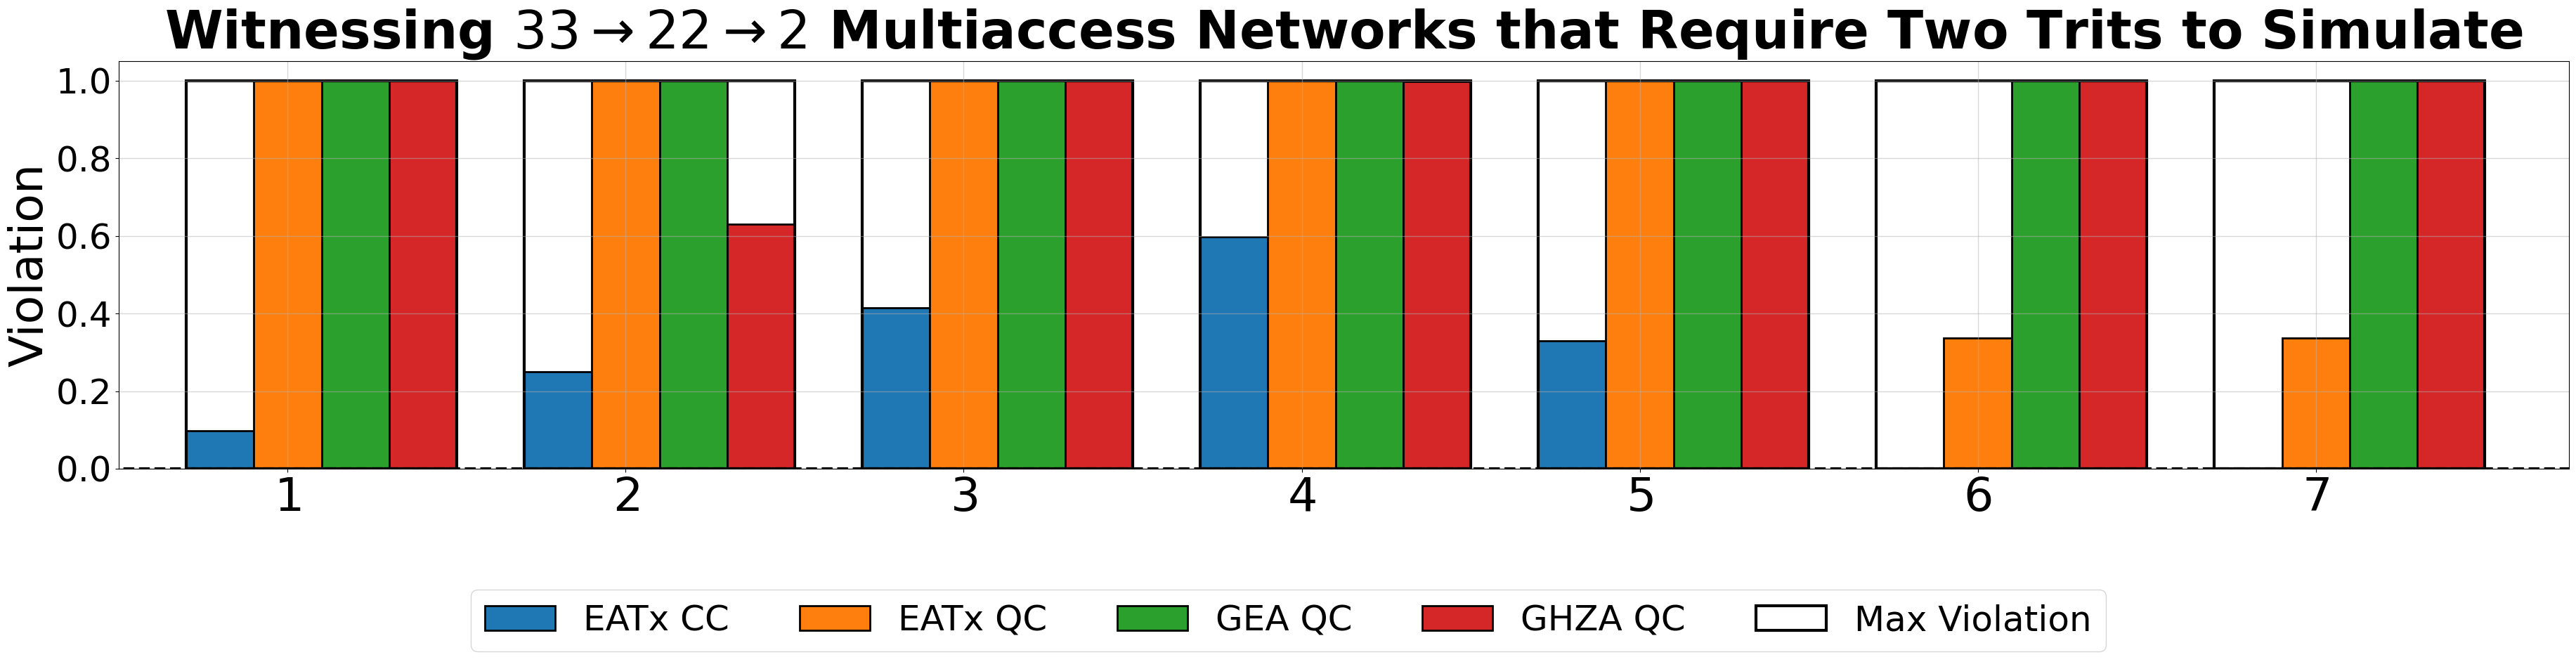

In [7]:
x_labels = [r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$",r"$7$"]

x_axis = np.arange(7)

width = 1/5

fig = plt.figure(figsize=(45, 10))
plt.grid(linewidth=1, alpha=0.5)


# plt.bar(x_axis-1*width, qmac_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
plt.bar(x_axis-1*width, eatx_mac_max_violations, width=width, label="EATx CC", edgecolor="black", linewidth=2)
plt.bar(x_axis+0*width, eatx_qmac_max_violations, width=width, label="EATx QC", edgecolor="black", linewidth=2)
# plt.bar(x_axis+2*width, ghza_cmac_max_violations, width=width, label="GHZA CC", edgecolor="black", linewidth=2)
# plt.bar(x_axis+3*width, gea_cmac_max_violations, width=width, label="GEA CC", edgecolor="black", linewidth=2)
plt.bar(x_axis+1*width, gea_qmac_max_violations, width=width, label="GEA QC", edgecolor="black", linewidth=2)
plt.bar(x_axis+2*width, ghza_qmac_max_violations, width=width, label="GHZA QC", edgecolor="black", linewidth=2)





# plt.bar(x_axis+1*width, quantum_bounds(), width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)
plt.bar(x_axis+0.5*width, np.ones(7), width=1-width,  label="Max Violation", edgecolor="black", linewidth=3, fill=False)
plt.plot([-1,8], np.zeros(2), "k--", linewidth=3)
plt.xlim(-0.5,6.75)




plt.xticks(x_axis, x_labels, fontsize=48)
plt.title(r"Witnessing $33\to22\to2$ Multiaccess Networks that Require Two Trits to Simulate", size=54, fontweight="bold")
plt.yticks(fontsize=36)
plt.ylabel("Violation", fontsize=48)
# plt.legend(fontsize=20, ncol=3)

plt.figlegend(loc="lower center", ncols = 6, fontsize=36)
plt.subplots_adjust(bottom=0.3)

plt.show()

/var/folders/z6/bqlrg3ln7vv6xm7m0frk46hc0000gn/T/ipykernel_10091/4059160466.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([""] + configuration_names, fontsize=32)
/var/folders/z6/bqlrg3ln7vv6xm7m0frk46hc0000gn/T/ipykernel_10091/4059160466.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([""] + configuration_names2, fontsize=32)
/var/folders/z6/bqlrg3ln7vv6xm7m0frk46hc0000gn/T/ipykernel_10091/4059160466.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


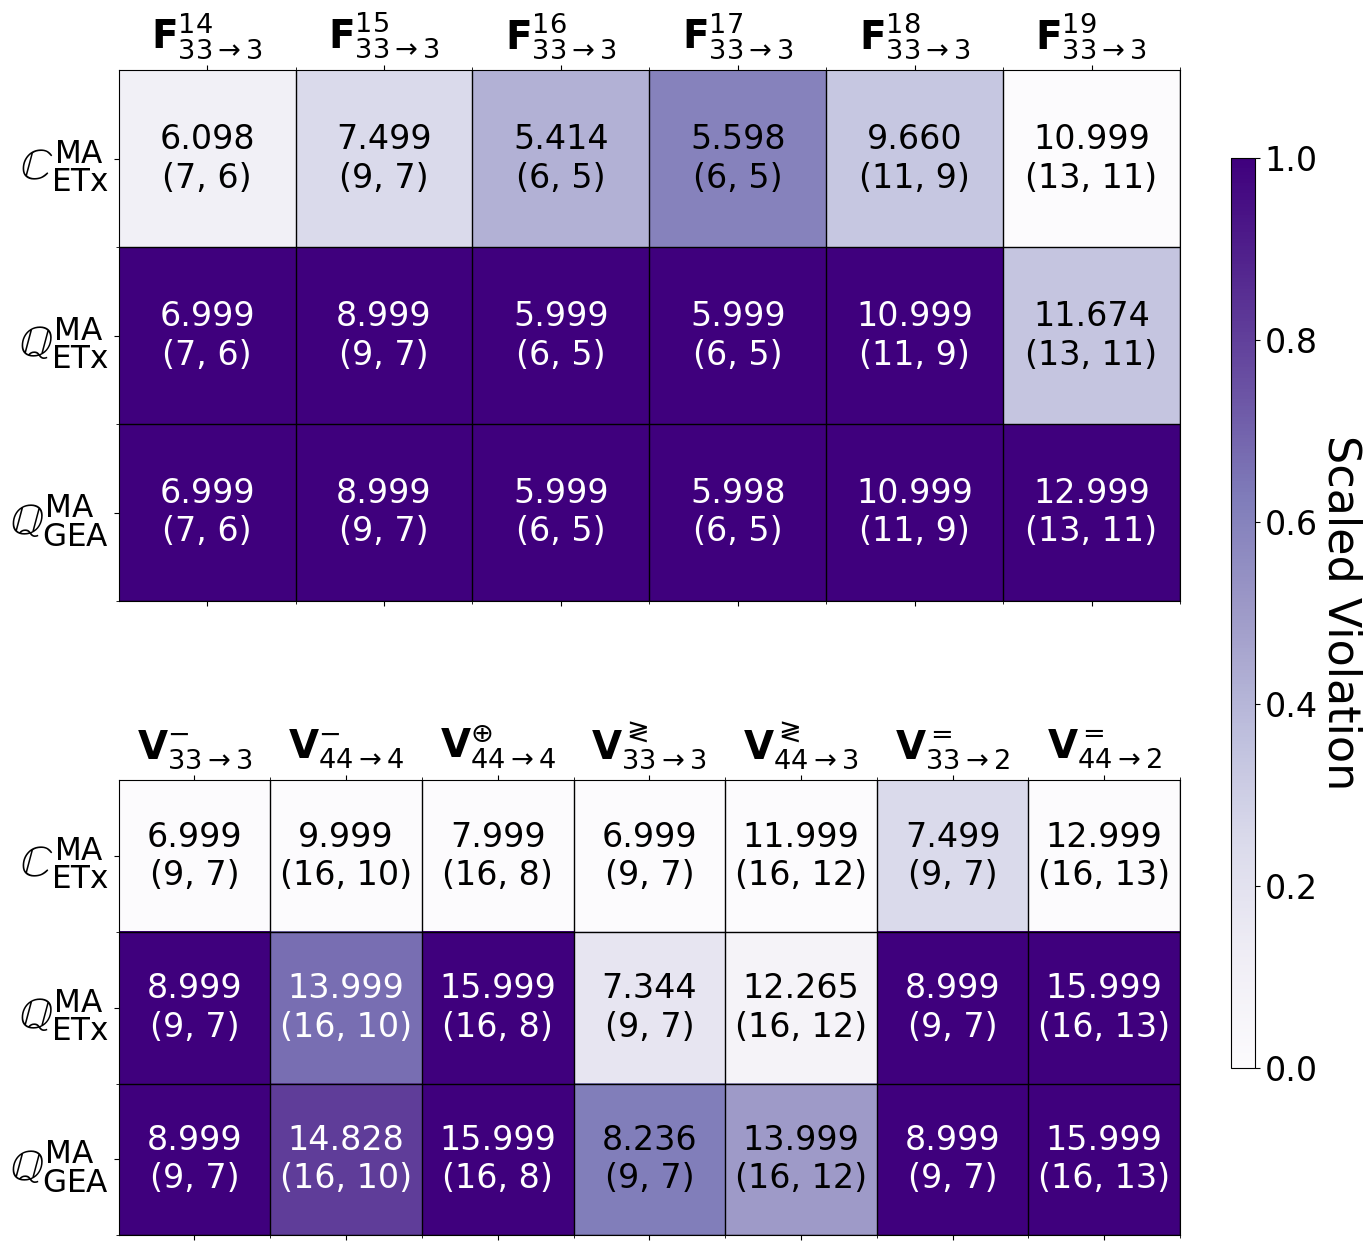

In [9]:
import matplotlib as mpl

fig, (ax, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,14))

# fig.suptitle("Violations of Classicality in\nEntanglement-Assisted Multiaccess Networks", size=36, y=1.01)


configuration_names = [
    r"$\mathbb{C}^{\rm{MA}}_{\rm{ETx}}$",
    r"$\mathbb{Q}^{\rm{MA}}_{\rm{ETx}}$",
    # r"$\mathbb{Q}^{\rm{MA}}_{\rm{GHZA}}$",
    r"$\mathbb{Q}^{\rm{MA}}_{\rm{GEA}}$",
]

configuration_names2 = [
    # r"$\mathbb{Q}^{\rm{MA}}$",
    r"$\mathbb{C}^{\rm{MA}}_{\rm{ETx}}$",
    # r"$\mathbb{C}^{\rm{MA}}_{\rm{GEA}}$",
    r"$\mathbb{Q}^{\rm{MA}}_{\rm{ETx}}$",
    r"$\mathbb{Q}^{\rm{MA}}_{\rm{GEA}}$",
]
game_names = [
    r"$\mathbf{F}^{14}_{33\to 3}$",
    r"$\mathbf{F}^{15}_{33\to 3}$",
    r"$\mathbf{F}^{16}_{33\to 3}$",
    r"$\mathbf{F}^{17}_{33\to 3}$",
    r"$\mathbf{F}^{18}_{33\to 3}$",
    r"$\mathbf{F}^{19}_{33\to 3}$",
    # r"$\mathbf{F}^{26}_{33\to 3}$",
]
game_names2 = [
    r"$\mathbf{V}^{-}_{33\to 3}$",
    r"$\mathbf{V}^{-}_{44\to 4}$",
    r"$\mathbf{V}^{\oplus}_{44\to 4}$",
    r"$\mathbf{V}^{\gtrless}_{33\to 3}$",
    r"$\mathbf{V}^{\gtrless}_{44\to 3}$",
    r"$\mathbf{V}^{=}_{33\to 2}$",
    r"$\mathbf{V}^{=}_{44\to 2}$",
]


cc_table_data = np.array([
    cbounds[:-1],
    cbounds[:-1],
    # cbounds[:-1],
    cbounds[:-1],
])
cc_table_data2 = np.array([
    # cbounds2,
    # cbounds2,
    cbounds2,
    cbounds2,
    cbounds2,
])


violation_table_data = np.array([
    eatx_mac_max_violations[:-1],
    eatx_qmac_max_violations[:-1],
    # ghza_qmac_max_violations[:-1],
    gea_qmac_max_violations[:-1],
])
violation_table_data2 = np.array([
    # qmac_max_violations2,
    eatx_mac_max_violations2,
    # gea_cmac_max_violations2,
    eatx_qmac_max_violations2,
    gea_qmac_max_violations2,
])

unscaled_violation_table_data = np.array([
    unscaled_eatx_mac_max_violations[:-1],
    unscaled_eatx_qmac_max_violations[:-1],
    # unscaled_ghza_qmac_max_violations[:-1],
    unscaled_gea_qmac_max_violations[:-1],
])

unscaled_violation_table_data2 = np.array([
    # unscaled_qmac_max_violations2,
    unscaled_eatx_mac_max_violations2,
    # unscaled_gea_cmac_max_violations2,
    unscaled_eatx_qmac_max_violations2,
    unscaled_gea_qmac_max_violations2,
])

max_table_data = np.array([
    qbounds[:-1],
    qbounds[:-1],
    # qbounds[:-1],
    qbounds[:-1],
])

max_table_data2 = np.array([
    qbounds2, qbounds2, qbounds2,
    # qbounds2, qbounds2, qbounds2
])


# color bar and plotting colored data
color_map_name = "Purples"
pcm = ax.matshow(violation_table_data, cmap=mpl.colormaps[color_map_name], vmax=1, vmin=0)
pcm2 = ax2.matshow(violation_table_data2, cmap=mpl.colormaps[color_map_name], vmax=1, vmin=0)


ax.set_yticks([y + 0.5 for y in range(0, len(configuration_names))], minor=True)

ax.set_xticks([x + 0.5 for x in range(0, len(game_names))], minor=True)
ax.set_xticks([x for x in range(0, len(game_names))], minor=False)
ax.grid(which="minor", ls="-", lw=1, color="black")
ax.set_xticklabels(game_names, fontsize=28)
ax.set_yticklabels([""] + configuration_names, fontsize=32)


ax2.set_yticks([y + 0.5 for y in range(0, len(configuration_names2))], minor=True)
ax2.set_xticks([x + 0.5 for x in range(0, len(game_names2))], minor=True)
ax2.set_xticks([x for x in range(0, len(game_names2))], minor=False)
ax2.grid(which="minor", ls="-", lw=1, color="black")
ax2.set_xticklabels(game_names2, fontsize=28)
ax2.set_yticklabels([""] + configuration_names2, fontsize=32)

mat_num_font=24
text_color_threshold = 0.65

import decimal
decimal.getcontext().rounding = decimal.ROUND_DOWN
n_decimals = 3

for y in range(len(cc_table_data)):
    for x in range(len(cc_table_data[0])):

        cc_val = cc_table_data[y][x]
        violation_val = violation_table_data[y][x]
        max_val = max_table_data[y][x]
        unscaled_violation_val = unscaled_violation_table_data[y][x]

        text_color = "white" if violation_val >= text_color_threshold else "black"

        ax.text(x, y, str(round(decimal.Decimal(unscaled_violation_val), n_decimals)) + "\n(" + str(int(max_val)) + ", " + str(int(cc_val)) + ")",
            horizontalalignment='center',
            verticalalignment='center',
            size=mat_num_font,
            color=text_color
        )

for y in range(len(cc_table_data2)):
    for x in range(len(cc_table_data2[0])):

        cc_val3 = cc_table_data2[y][x]
        violation_val2 = violation_table_data2[y][x]
        max_val3 = max_table_data2[y][x]
        unscaled_violation_val2 = unscaled_violation_table_data2[y][x]

        text_color = "white" if violation_val2 >= text_color_threshold else "black"


        ax2.text(x, y, str(round(decimal.Decimal(unscaled_violation_val2), n_decimals)) + "\n(" + str(int(max_val3)) + ", " + str(int(cc_val3)) + ")",
            horizontalalignment='center',
            verticalalignment='center',
            size=mat_num_font,
            color=text_color
        )
       


cb_ax = fig.add_axes([1.03, 0.2, 0.02, 0.65])
cbar = fig.colorbar(pcm, cax=cb_ax)
cbar.ax.set_ylabel('Scaled Violation', rotation=270, size=32, labelpad=32)
cbar.ax.tick_params(labelsize=mat_num_font)

plt.tight_layout()